In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 家電  

## 電気ケトル

### 時刻別消費電力量
$$
\begin{cases}
E_{ Elc, kttl, boil } \times tm_{ kttl, boil, d, t } \times 10^{ -3 } & (4人世帯) \\
E_{ Elc, kttl, boil } \times tm_{ kttl, boil, d, t } \times 10^{ -3 } \times \frac{ 1 }{ 3 } & (2人世帯) \\
E_{ Elc, kttl, boil } \times tm_{ kttl, boil, d, t } \times 10^{ -3 } \times \frac{ 2 }{ 3 } & (1人世帯)
\end{cases}
$$

$ E_{ Elc, washer, d, t } $：日付dの時刻tにおける消費電力量,kWh  
$ E_{ Elc, washer, wash } $：1回の沸き上げ消費電力量,Wh  
$ tm_{ wahser, d, t } $：日付dの時刻tにおける沸き上げ回数,回  
$ 10^{ -3 } $：単位換算,Wh -> kWh

In [2]:
def get_E_Elc_kttl_d_t(P_Elc_kttl_boil_rtd, tm_kttl_boil_d_t, number_of_people):
    """時刻別の消費電力を計算する
    
    Parameters
    ----------
    P_Elc_kttl_boil_rtd : float
        定格消費電力,W
        
    number_of_people : int
        世帯人数, 人
        
    Returns
    ----------
    E_Elc_kttl_d_t : ndarray(N-dimensional array)
        1年間の全時間の消費電力量を格納したND配列, Wh
        d日t時の消費電力量が年開始時から8760個連続して格納されている
    """
    
    E_Elc_kttl_boil = get_E_Elc_kttl_boil(P_Elc_kttl_boil_rtd)
    
    if number_of_people == 4:
        E_Elc_kttl_d_t = E_Elc_kttl_boil * tm_kttl_boil_d_t
    elif number_of_people == 2:
        E_Elc_kttl_d_t = E_Elc_kttl_boil * tm_kttl_boil_d_t * 1 / 3
    elif number_of_people == 1:
        E_Elc_kttl_d_t = E_Elc_kttl_boil * tm_kttl_boil_d_t * 2 / 3
    else:
        raise ValueError(number_of_people)
        
    return E_Elc_kttl_d_t

### 動作別の消費電力

#### 沸き上げ時の消費電力量  
$$
E_{ Elc, kttl, boil } = P_{ Elc, kttl, boil, rtd } \times 0.1
$$

$ E_{ Elc, kttl, boil, rtd } $：定格消費電力量,W  
$ 0.1 $：沸き上げ時間（1回の沸き上げ時間6分）,h 

In [3]:
def get_E_Elc_kttl_boil(P_Elc_kttl_boil_rtd):
    """沸き上げ時の消費電力量を計算する
    
    Parameters
    ----------
    P_Elc_kttl_boil_rtd : float
        定格消費電力,W
        
    Returns
    ----------
    E_Elc_kttl_boil : float
        1回の沸き上げ消費電力量,Wh
    """

    E_Elc_kttl_boil = P_Elc_kttl_boil_rtd * 0.1

        
    return E_Elc_kttl_boil

## サンプル計算

### 家電スケジュールの読み込み
ここでは、サンプルデータをcsvファイルから読み込む

In [4]:
def import_schedule_1_d_t() -> np.ndarray:
    """家電スケジュールを外部CSVファイルからND配列に読み込む
    
    Returns
    ----------
    E_Elc_tv_led_d_t : ndarray(N-dimensional array)
        1年間の全時間の家電スケジュールを格納したND配列
        d日t時の家電スケジュールが年開始時から8760個連続して格納されている
    """
    
    df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
    ds = df['電気ケトル_4人世帯_沸上']
    schedule_1_d_t = ds.values
    return schedule_1_d_t

#### 洗濯時の消費電力量

In [5]:
get_E_Elc_kttl_boil(1160)

116.0

### 時刻別消費電力量

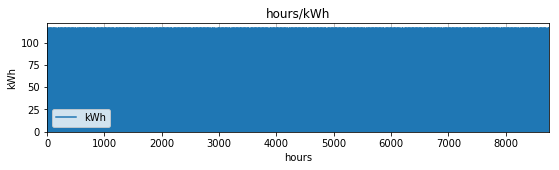

In [6]:
tm_kttl_boil_d_t = import_schedule_1_d_t()

x = np.arange(8760)
y = get_E_Elc_kttl_d_t(1160, tm_kttl_boil_d_t, 4)

plt.figure(figsize=(9,2))
plt.subplot(1,1,1)
plt.plot(x, y, label="kWh")

plt.grid(True)

plt.title("hours/kWh")
plt.xlabel("hours")
plt.ylabel("kWh")

plt.xlim(0,8760)
plt.ylim(0,)

plt.legend()
plt.show()

### 省エネ基準との比較用時刻別消費電力量の書き出し

In [7]:
tm_washer_wash_d_t = import_schedule_1_d_t()

tm_kttl_boil_d_t = import_schedule_1_d_t()

dat = get_E_Elc_kttl_d_t(1160, tm_kttl_boil_d_t, 4)

np.savetxt('tmp.csv',dat,delimiter=',',fmt = " %s ")

dat

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])